# WeatherPy
----


#### Analyis


1. Temperature correlates well with latitude because as the maximum temperature decreases, there's a direct increase in the distance away from the equator on both hemispheres.

2. There isn't correlation between humidity levels and latitude on the Northern Hemisphere since its humidity levels ranges from 10% and 100%.

3. There isn't correlation between cloudiness and latitude on both hemispheres because the cloudiness levels are scattered across all latitudes. 

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [23]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [24]:
# Url and units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [25]:
# Set up lists to hold response info:
name=[]         # list for city name
cloud=[]        # list for cloudines
ctry=[]         # list for country
date=[]         # list for date
humi=[]         # list for humidity
lat=[]          # list for latitude
lng=[]          # list for longitude
maxtemp=[]      # list for max temperature
wind=[]         # list for wind speed

# Loop through the list of cities and perform a request for data on each and add data to corresponding lists:

count=1 # Set counter to start value 1 for printouts of the current set count.

print('Beginning Data Retrieval')     
print('-----------------------------')
for city in cities:
        response=requests.get(query_url + city).json()
        
        print('Processing Record ' + str(count) + ' of ' + str(len(cities)) + ' | ' + city)
        
        try:                                                # Ignore errors in response.
            name.append(response['name'])
            cloud.append(response['clouds']['all'])
            ctry.append(response['sys']['country'])
            date.append(response['dt'])
            humi.append(response['main']['humidity'])             
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])             
            maxtemp.append(response['main']['temp_max'])
            wind.append(response['wind']['speed'])     
        except KeyError:
            print('City not found. Skipping')             # Make an exception incase link is invalid
              
        count=count+1
        
# Make a notification to alert the completion of the task        
print("-"*20)
print("Data Retrieval Complete")      
print("-"*20)

Beginning Data Retrieval
-----------------------------
Processing Record 1 of 634 | belushya guba
City not found. Skipping
Processing Record 2 of 634 | jamestown
Processing Record 3 of 634 | barrow
Processing Record 4 of 634 | butaritari
Processing Record 5 of 634 | rikitea
Processing Record 6 of 634 | saint-augustin
Processing Record 7 of 634 | busselton
Processing Record 8 of 634 | mahanoro
Processing Record 9 of 634 | manitouwadge
Processing Record 10 of 634 | vredendal
Processing Record 11 of 634 | airai
Processing Record 12 of 634 | hermanus
Processing Record 13 of 634 | kapaa
Processing Record 14 of 634 | sentyabrskiy
City not found. Skipping
Processing Record 15 of 634 | loandjili
Processing Record 16 of 634 | ushuaia
Processing Record 17 of 634 | clyde river
Processing Record 18 of 634 | punta arenas
Processing Record 19 of 634 | bredasdorp
Processing Record 20 of 634 | cap-aux-meules
Processing Record 21 of 634 | correntina
Processing Record 22 of 634 | goure
Processing Record

Processing Record 193 of 634 | weligama
Processing Record 194 of 634 | tuktoyaktuk
Processing Record 195 of 634 | hasaki
Processing Record 196 of 634 | ouro preto do oeste
Processing Record 197 of 634 | ust-kuyga
Processing Record 198 of 634 | kodiak
Processing Record 199 of 634 | carroll
Processing Record 200 of 634 | bethel
Processing Record 201 of 634 | lazaro cardenas
Processing Record 202 of 634 | namibe
Processing Record 203 of 634 | litovko
Processing Record 204 of 634 | gwadar
Processing Record 205 of 634 | sisimiut
Processing Record 206 of 634 | jever
Processing Record 207 of 634 | lagos
Processing Record 208 of 634 | lompoc
Processing Record 209 of 634 | cairns
Processing Record 210 of 634 | bernburg
Processing Record 211 of 634 | codrington
Processing Record 212 of 634 | mujiayingzi
Processing Record 213 of 634 | cacapava do sul
Processing Record 214 of 634 | emba
Processing Record 215 of 634 | bengkulu
Processing Record 216 of 634 | tiksi
Processing Record 217 of 634 | muro

Processing Record 390 of 634 | plettenberg bay
Processing Record 391 of 634 | pelym
Processing Record 392 of 634 | gat
Processing Record 393 of 634 | verkh-usugli
Processing Record 394 of 634 | phalaborwa
Processing Record 395 of 634 | pimenta bueno
Processing Record 396 of 634 | shimoda
Processing Record 397 of 634 | lorengau
Processing Record 398 of 634 | bontang
Processing Record 399 of 634 | idritsa
Processing Record 400 of 634 | tasiilaq
Processing Record 401 of 634 | barbar
City not found. Skipping
Processing Record 402 of 634 | mazara del vallo
Processing Record 403 of 634 | sudak
Processing Record 404 of 634 | dwarka
Processing Record 405 of 634 | ankang
Processing Record 406 of 634 | havre-saint-pierre
Processing Record 407 of 634 | vostok
Processing Record 408 of 634 | tolaga bay
Processing Record 409 of 634 | jiwani
Processing Record 410 of 634 | lucapa
Processing Record 411 of 634 | nizhniy baskunchak
Processing Record 412 of 634 | campo formoso
Processing Record 413 of 634

Processing Record 586 of 634 | kamaishi
Processing Record 587 of 634 | campagna
Processing Record 588 of 634 | bairiki
Processing Record 589 of 634 | baherden
Processing Record 590 of 634 | taoudenni
Processing Record 591 of 634 | cootamundra
Processing Record 592 of 634 | kolpashevo
Processing Record 593 of 634 | port-cartier
Processing Record 594 of 634 | praia
Processing Record 595 of 634 | yandoon
City not found. Skipping
Processing Record 596 of 634 | paso de carrasco
Processing Record 597 of 634 | zhezkazgan
Processing Record 598 of 634 | roebourne
Processing Record 599 of 634 | fallon
Processing Record 600 of 634 | mehamn
Processing Record 601 of 634 | muncie
Processing Record 602 of 634 | hatillo
Processing Record 603 of 634 | ramanuj ganj
Processing Record 604 of 634 | padang
Processing Record 605 of 634 | abha
Processing Record 606 of 634 | kitimat
Processing Record 607 of 634 | teya
Processing Record 608 of 634 | mao
Processing Record 609 of 634 | ellisras
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [26]:
# Create a data frame from api call list:
weather_dict = {
    'City': name,
    'Country': ctry,
    'Date': date,
    'Lat': lat,
    'Lng': lng,
    'Cloudiness': cloud,
    'Humidity': humi,
    'Max Temp': maxtemp,
    'Wind Speed': wind
}

WeatherPy_df=pd.DataFrame(weather_dict)

# Test/clean data:
WeatherPy_df.isnull().sum()
WeatherPy_df.dropna() 
WeatherPy_df.count()

City          584
Country       584
Date          584
Lat           584
Lng           584
Cloudiness    584
Humidity      584
Max Temp      584
Wind Speed    584
dtype: int64

In [27]:
# Reset index to start at 0
WeatherPy_df = WeatherPy_df.reset_index(drop=True)


# Reorder columns
WeatherPy_df = WeatherPy_df[["City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", 
                             "Wind Speed", "Country", "Date"]]

# Change from object to float data type
WeatherPy_df['Lat'] = WeatherPy_df['Lat'].astype(float, errors = 'raise')
WeatherPy_df['Lng'] = WeatherPy_df['Lng'].astype(float, errors = 'raise')
WeatherPy_df['Max Temp'] = WeatherPy_df['Max Temp'].astype(float, errors = 'raise')
WeatherPy_df['Cloudiness'] = WeatherPy_df['Cloudiness'].astype(float, errors = 'raise')
WeatherPy_df['Wind Speed'] = WeatherPy_df['Wind Speed'].astype(float, errors = 'raise')
WeatherPy_df['Date'] = WeatherPy_df['Date'].astype(float, errors = 'raise')

# save to csv file
WeatherPy_df.to_csv("WeatherPy.csv", encoding='utf-8', index=False)


# Display the city weather data frame
WeatherPy_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,65.52,36,20.0,5.75,US,1.649802e+09
1,Barrow,71.2906,-156.7887,1.42,66,0.0,9.22,US,1.649802e+09
2,Butaritari,3.0707,172.7902,81.21,78,44.0,16.46,KI,1.649801e+09
3,Rikitea,-23.1203,-134.9692,79.18,69,5.0,16.71,PF,1.649802e+09
4,Saint-Augustin,51.2260,-58.6502,33.31,98,87.0,5.01,CA,1.649802e+09


In [28]:
WeatherPy_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,5.840000e+02
mean,19.686799,19.597025,60.135531,70.832192,59.118151,8.107517,1.649802e+09
std,32.662307,87.318921,21.837360,23.075369,38.120214,6.027943,2.689610e+02
min,-54.800000,-175.200000,-11.180000,1.000000,0.000000,0.000000,1.649801e+09
25%,-7.284425,-57.830675,45.495000,60.000000,20.000000,3.440000,1.649802e+09
50%,23.345450,19.903500,66.045000,77.000000,74.500000,6.765000,1.649802e+09
75%,48.001400,97.242850,77.957500,88.000000,99.000000,11.500000,1.649802e+09
max,78.218600,178.416700,99.680000,100.000000,100.000000,33.380000,1.649802e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
This section is skipped because there aren't any cities that have humidity > 100%.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs in the output_data folder
* Below are examples of what you should get but your results will be different.

## Latitude vs. Temperature Plot

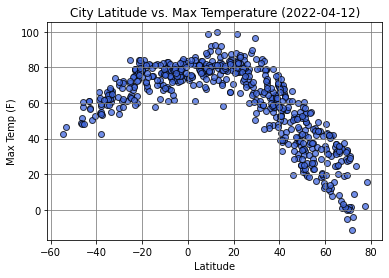

In [29]:
import datetime as dt

#Latitude Vs Temperature 

# Build Scatter Plot
plt.scatter(WeatherPy_df['Lat'],WeatherPy_df['Max Temp'], facecolor='royalblue', 
            edgecolors='black', marker="o", alpha=0.75)


plt.title('City Latitude vs. Max Temperature' + ' (' + str(dt.datetime.now().date()) + ')')
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid(b=True, which='major',axis="both", linestyle="-", color="grey")

# Save the figure:
plt.savefig('output_data/City Latitude vs. MaxTemp.png')

# Show plot
plt.show()

This plot shows the maximum temperature for different cities depending on their distance from the equator towards North and South. There is a strong correlation between the temperature and latitude on both hemispheres.

## Latitude vs. Humidity Plot

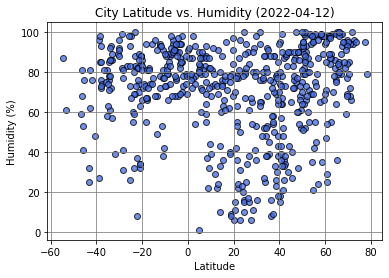

In [30]:
#Humidity Vs. Latitude
plt.scatter(WeatherPy_df['Lat'],WeatherPy_df['Humidity'], facecolor='royalblue', 
            edgecolors='black', marker="o", alpha=0.75)


# Set titles
plt.title('City Latitude vs. Humidity' + ' (' + str(dt.datetime.now().date()) + ')')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(b=True, which='major',axis="both", linestyle="-", color="grey")

# Save the figure:
plt.savefig('output_data/City Latitude vs. Humidity.png')

# Show plot
plt.show()

This plot shows that there are high levels of humidity next to the equator.

## Latitude vs. Cloudiness Plot

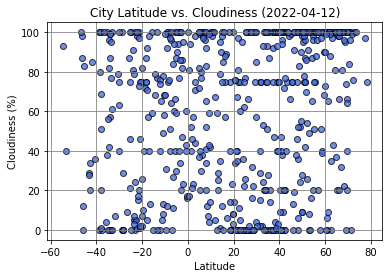

In [31]:
#Cloudiness Vs. Latitude 
plt.scatter(WeatherPy_df['Lat'],WeatherPy_df['Cloudiness'], facecolor='royalblue', 
            edgecolors='black', marker="o", alpha=0.75)


# Set titles
plt.title('City Latitude vs. Cloudiness' + ' (' + str(dt.datetime.now().date()) + ')')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b=True, which='major',axis="both", linestyle="-", color="grey")

# Save the figure:
plt.savefig('output_data/City Latitude vs. Cloudiness.png')

# Show plot
plt.show()

This plot shows that there isn't correlation between cloudiness and latitude. 

## Latitude vs. Wind Speed Plot

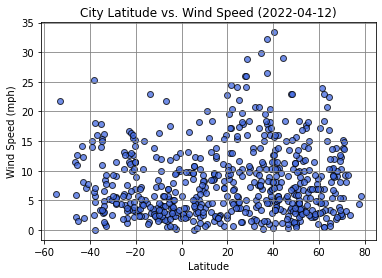

In [32]:
#Wind Speed Vs. Latitude
plt.scatter(WeatherPy_df['Lat'],WeatherPy_df['Wind Speed'], facecolor='royalblue', 
            edgecolors='black', marker="o", alpha=0.75)


# Set titles
plt.title('City Latitude vs. Wind Speed' + ' (' + str(dt.datetime.now().date()) + ')')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(b=True, which='major',axis="both", linestyle="-", color="grey")

# Save the figure:
plt.savefig('output_data/City Latitude vs. Wind Speed.png')

# Show plot
plt.show()

This plot shows that there is little to no correlation between wind speed and latitude on both hemispheres.

## Linear Regression

In [33]:
# Create new data frame for northern hemisphere (lat >= 0 degree):
weather_data_north = WeatherPy_df[WeatherPy_df['Lat'] >= 0]

#weather_data_north.count()

# Create new data frame for southern hemisphere (lat < 0 degree):
weather_data_south = WeatherPy_df[WeatherPy_df['Lat'] < 0]

#weather_data_south.count()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8695378432252246


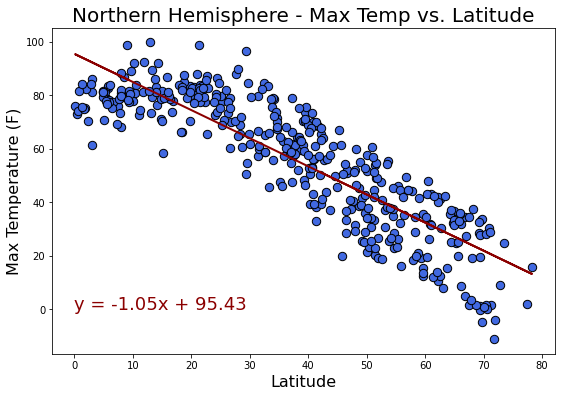

In [34]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_north['Lat']
y_values = weather_data_north['Max Temp']

# Perform a linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))


# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Max Temp vs. Latitude', fontsize=20)
plt.ylabel('Max Temperature (F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(0, 0), fontsize=18, color='darkred')
#plt.grid(False)



# Print r-squared value:
print(f'The r-value is: {rvalue}')

# Save the figure:
plt.savefig('output_data/City Latitude vs. MaxTemp_North.png')

# Show plot:
plt.show()

There is a strong correlation between the latitude and maximum temperature on the Northern Hemisphere. As latitude increases, maximum temperature decreases.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7430116070967256


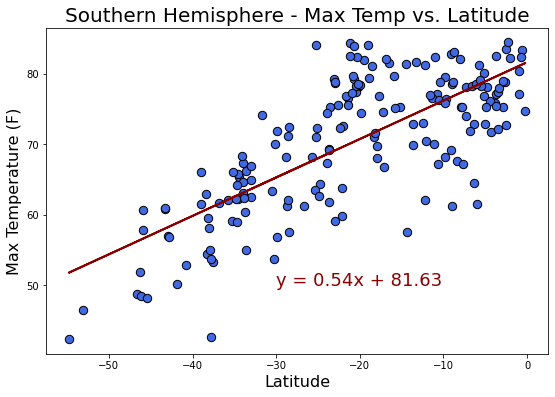

In [35]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_south['Lat']
y_values = weather_data_south['Max Temp']

# Perform a linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq2 = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Max Temp vs. Latitude', fontsize=20)
plt.ylabel('Max Temperature (F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq2,(-30, 50),fontsize=18, color='darkred')
#plt.grid(False)



# Print r-squared value:
print(f'The r-value is: {rvalue}')

# Save the figure:
plt.savefig('output_data/City Latitude vs. MaxTemp_South.png')

# Show plot:
plt.show()

There is a positive correlation between maximum temperature and a latitude on the Southern Hemisphere. As the latitude increases/ gets closer to the equator, the maximum temperature increases. The Southern Hemisphere's maximum temperature variance is greater than the Northern Hemisphere's and there's a broader maximum temperature variation for different cities positioned on the same latitude on the Southern Hemisphere too.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.23433125091969256


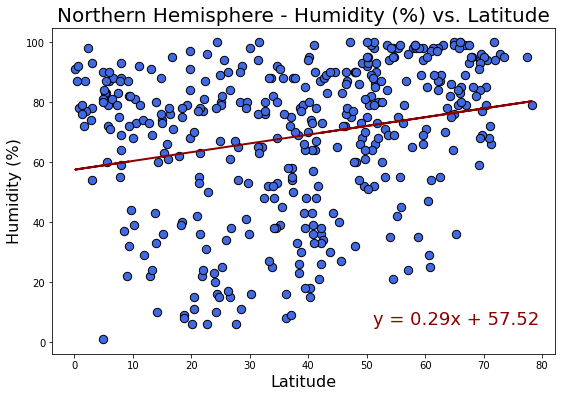

In [36]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_north['Lat']
y_values = weather_data_north['Humidity']

# Perform a linear regression for humidity vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude', fontsize=20)
plt.ylabel('Humidity (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(51,6),fontsize=18, color='darkred')
#plt.grid(False)


# Print r-squared value:
print(f'The r-value is: {rvalue}')

# Save the figure:
plt.savefig('output_data/City Latitude vs. Humidity_North.png')

# Show plot:
plt.show()

There is almost no correlation between the humidity level and latitude for the Northern Hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.243916789873366


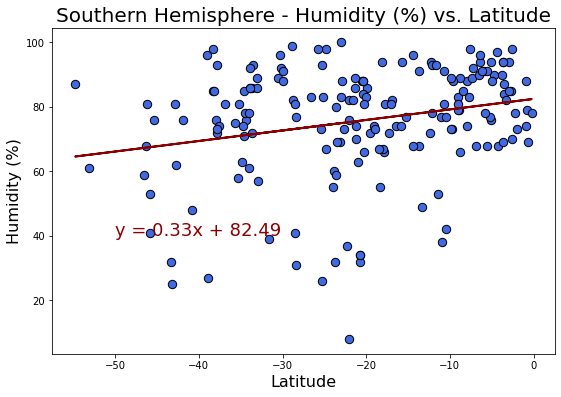

In [37]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_south['Lat']
y_values = weather_data_south['Humidity']

# Perform a linear regression for humidity vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude', fontsize=20)
plt.ylabel('Humidity (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-50,40), fontsize=18, color='darkred')
#plt.grid(False)



# Print r-squared value:
print(f'The r-value is: {rvalue}')

# Save the figure:
plt.savefig('output_data/City Latitude vs. Humidity_South.png')

# Show plot:
plt.show()

There is almost no correlation between humidity levels and a city position on the Southern Hemisphere. Higher levels of humidity are observed close to the equator.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.21537788685411507


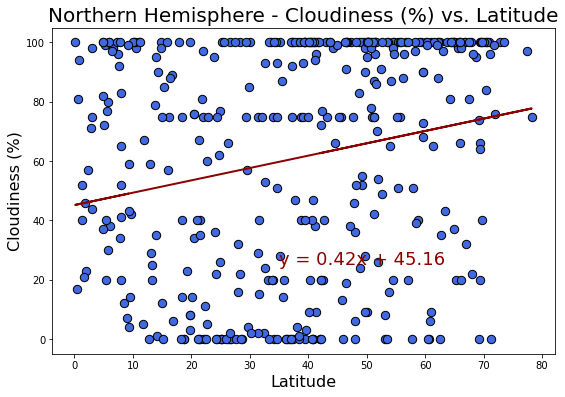

In [38]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_north['Lat']
y_values = weather_data_north['Cloudiness']

# Perform a linear regression for cloudiness vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude', fontsize=20)
plt.ylabel('Cloudiness (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(35,25), fontsize=18, color='darkred')
#plt.grid(False)



# Print r-squared value:
print(f'The r-value is: {rvalue}')

# Save the figure:
plt.savefig('output_data/City Latitude vs. Cloudiness_North.png')

# Show plot:
plt.show()

There isn't correlation between cloudiness and latitude on the Northern Hemisphere. Cloudiness levels are scatttered across all latitudes.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.10129061869304024


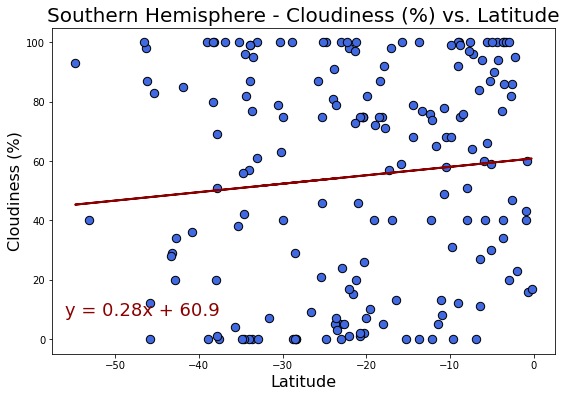

In [39]:
# build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_south['Lat']
y_values = weather_data_south['Cloudiness']

# Perform a linear regression for cloudiness vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude', fontsize=20)
plt.ylabel('Cloudiness (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-56,8), fontsize=18, color='darkred')
#plt.grid(False)


# Print r-squared value:
print(f'The r-value is: {rvalue}')

# Save the figure:
plt.savefig('output_data/City Latitude vs. Cloudiness_South.png')

# Show plot:
plt.show()

There isn't correlation between cloudiness and latitude on the Southern Hemisphere. Cloudiness levels ranges from 0% to 100%.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.01188208375636434


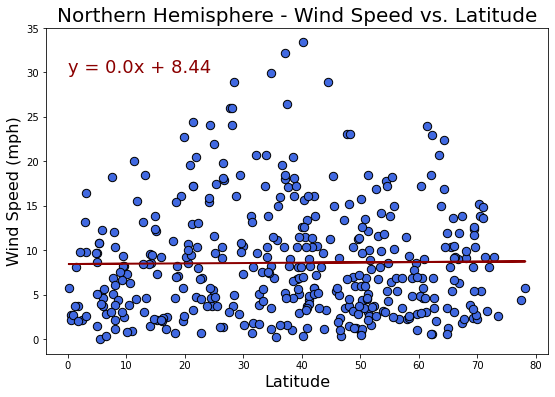

In [40]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_north['Lat']
y_values = weather_data_north['Wind Speed']

# Perform a linear regression for wind speed vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Wind Speed vs. Latitude', fontsize=20)
plt.ylabel('Wind Speed (mph)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(0,30), fontsize=18, color='darkred')
#plt.grid(False)



# Print r-squared value:
print(f'The r-value is: {rvalue}')

# Save the figure:
plt.savefig('output_data/City Latitude vs. Wind_North.png')

# Show plot:
plt.show()

There is very low correlation between the wind speed and latitude on the Northern Hemisphere. The majority of cities on the Northern Hemisphere have wind speed levels ranging between 0 mph and 20 mph.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.2210688851472046


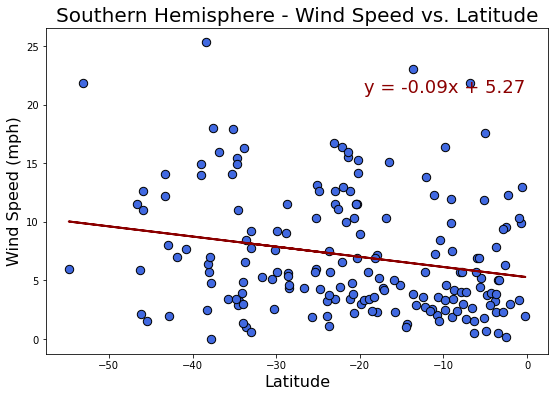

In [41]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_south['Lat']
y_values = weather_data_south['Wind Speed']

# Perform a linear regression on wind speed vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Wind Speed vs. Latitude', fontsize=20)
plt.ylabel('Wind Speed (mph)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-19.5,21), fontsize=18, color='darkred')
#plt.grid(False)


# Print r-squared value:
print(f'The r-squared is: {rvalue}')

# Save the figure:
plt.savefig('output_data/City Latitude vs. Wind_South.png')

# Show plot:
plt.show()

There is a very low negative correlation between wind speed and latitude on the Southern Hemisphere. As the latitude decreases away from the equator, the wind speed lightly increases.